# Chapter 7 Problem 1 (Gelman & Hill)

*Discrete probability simulation: suppose that a basketball player has a 60% chance of making a shot, and he keeps taking shots until he misses two in a row. Also assume his shots are independent (so that each shot has 60% probability of success, no matter what happened before).*

### Part A

*Write an R function to simulate this process.*

In [36]:
p.shot <- .60
n.shots.max <- 100
done <- 0
consecutive.missed <- 0
for (s in 1:n.shots.max) {
    outcome <- rbinom(1, 1, p.shot)
    consecutive.missed <- ifelse(outcome==0, consecutive.missed + 1, 0)
    if (consecutive.missed==2) break 
}
s

[1] 8

### Part B

*Put the R function in a loop to simulate the process 1000 times. Use the simulation to estimate the mean, standard deviation, and distribution of the
total number of shots that the player will take.*


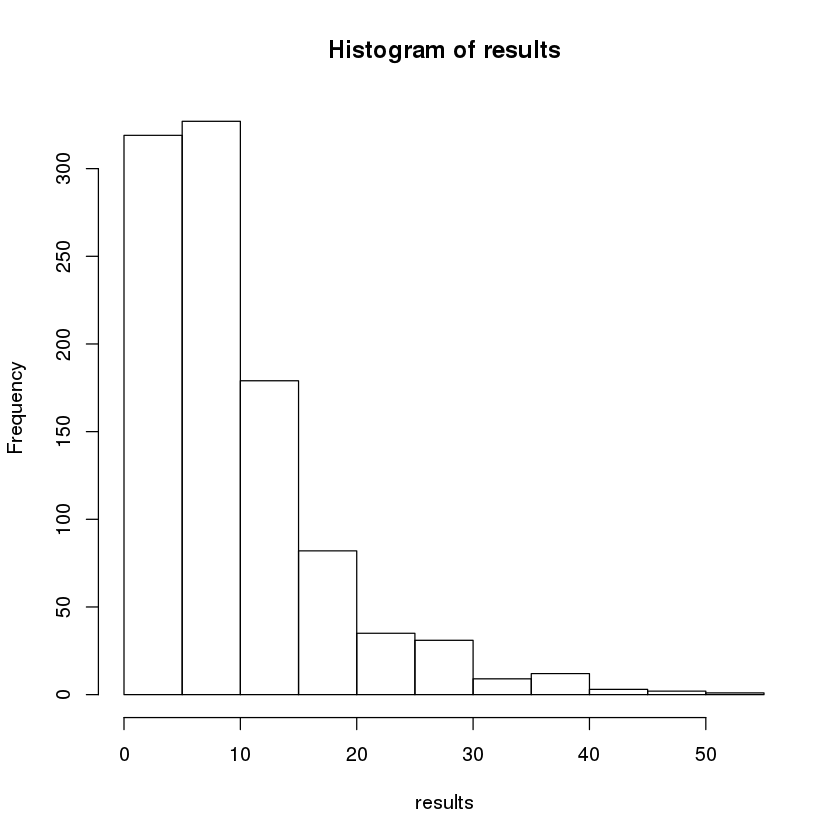

In [37]:
p.shot <- .60
n.shots.max <- 100
n.sims <- 1000
results <- rep(NA, n.sims)
for (i in 1:n.sims) {
    for (s in 1:n.shots.max) {
        outcome <- rbinom(1, 1, p.shot)
        consecutive.missed <- ifelse(outcome==0, consecutive.missed + 1, 0)
        if (consecutive.missed==2) break 
    }
    results[i] <- s
}
hist(results)

### Part C

*Using your simulations, make a scatterplot of the number of shots the player will take and the proportion of shots that are successes.*

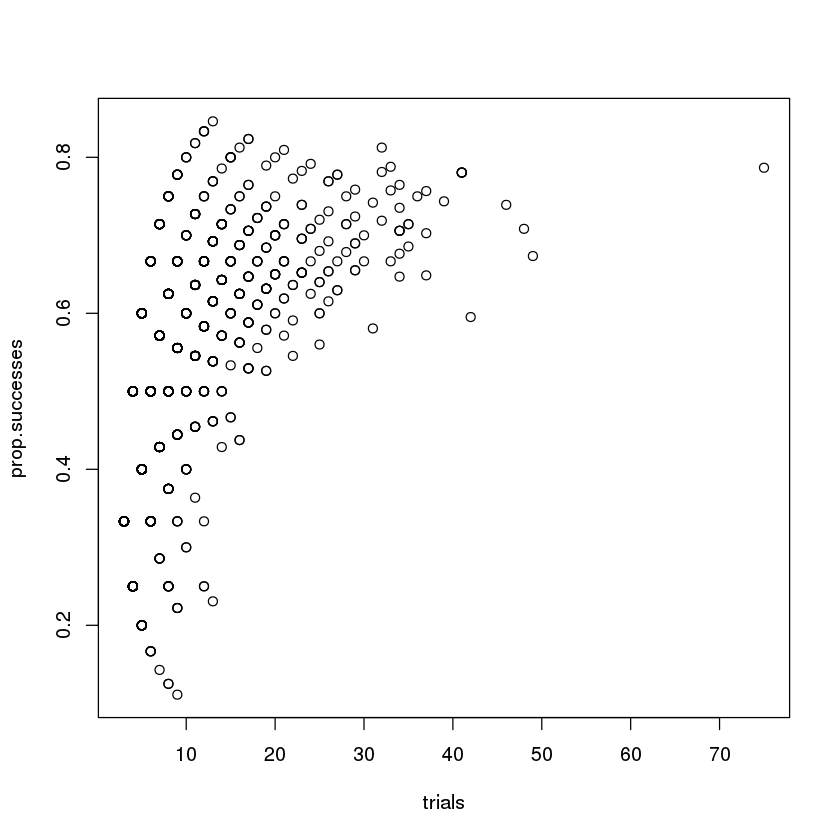

In [43]:
p.shot <- .60
n.shots.max <- 100
n.sims <- 1000
trials <- rep(NA, n.sims)
successes <- rep(NA, n.sims)
prop.successes <- rep(NA, n.sims)
for (i in 1:n.sims) {
    s <- 0
    for (t in 1:n.shots.max) {
        outcome <- rbinom(1, 1, p.shot)
        s <- ifelse(outcome==1, s+1, s)
        consecutive.missed <- ifelse(outcome==0, consecutive.missed+1, 0)
        if (consecutive.missed==2) break 
    }
    trials[i] <- t
    successes[i] <- s
    prop.successes[i] <- s/t
}
plot(trials, prop.successes)